In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Download data from yfinance

In [2]:
symbol = '2800.HK'
stock = yf.Ticker(symbol)
df_train = stock.history(start="2008-01-01", end="2020-12-31")
stock_data_train = df_train[['Open',  'High',  'Low',  'Close', 'Volume']]
df_test = stock.history(start="2020-12-31", end="2022-12-31")
stock_data_test = df_test[['Open',  'High',  'Low',  'Close', 'Volume']]

In [3]:
stock_data_train

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,27.730000,27.730000,27.730000,27.730000,0
2008-01-03,27.059999,27.059999,27.059999,27.059999,0
2008-01-04,27.690001,27.690001,27.690001,27.690001,0
2008-01-07,27.350000,27.350000,27.350000,27.350000,0
2008-01-08,27.280001,27.280001,27.280001,27.280001,0
...,...,...,...,...,...
2020-12-23,26.260000,26.520000,26.240000,26.520000,54078882
2020-12-24,26.600000,26.600000,26.600000,26.600000,0
2020-12-28,26.580000,26.700001,26.459999,26.480000,96582169


Preprocess data into desired column

In [4]:
stock_data_train['Day _n-1 Price Change %'] = (stock_data_train.iloc[:,3].shift(1) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-2 Price Change %'] = (stock_data_train.iloc[:,3].shift(2) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-3 Price Change %'] = (stock_data_train.iloc[:,3].shift(3) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-4 Price Change %'] = (stock_data_train.iloc[:,3].shift(4) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-5 Price Change %'] = (stock_data_train.iloc[:,3].shift(5) - stock_data_train['Close']) / stock_data_train['Close'] * 100

stock_data_train['Next Price'] = stock_data_train.iloc[:,3].shift(-1)
stock_data_train['Next Price Change %'] = (stock_data_train['Next Price'] - stock_data_train['Close']) / stock_data_train['Close'] * 100

stock_data_test['Day _n-1 Price Change %'] = (stock_data_test.iloc[:,3].shift(1) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-2 Price Change %'] = (stock_data_test.iloc[:,3].shift(2) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-3 Price Change %'] = (stock_data_test.iloc[:,3].shift(3) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-4 Price Change %'] = (stock_data_test.iloc[:,3].shift(4) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-5 Price Change %'] = (stock_data_test.iloc[:,3].shift(5) - stock_data_test['Close']) / stock_data_test['Close'] * 100

stock_data_test['Next Price'] = stock_data_test.iloc[:,3].shift(-1)
stock_data_test['Next Price Change %'] = (stock_data_test['Next Price'] - stock_data_test['Close']) / stock_data_test['Close'] * 100

C:\Users\user\AppData\Local\Temp\ipykernel_24212\3822148608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_train['Day _n-1 Price Change %'] = (stock_data_train.iloc[:,3].shift(1) - stock_data_train['Close']) / stock_data_train['Close'] * 100
C:\Users\user\AppData\Local\Temp\ipykernel_24212\3822148608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_test['Day _n-1 Price Change %'] = (stock_data_test.iloc[:,3].shift(1) - stock_data_test['Close']) / stock_data_test['Close'] * 100

In [5]:
stock_data_train

,Open,High,Low,Close,Volume,Day _n-1 Price Change %,Day _n-2 Price Change %,Day _n-3 Price Change %,Day _n-4 Price Change %,Day _n-5 Price Change %,Next Price,Next Price Change %
Date,,,,,,,,,,,,
2008-01-02,27.730000,27.730000,27.730000,27.730000,0,NaN,NaN,NaN,NaN,NaN,27.059999,-2.416156
2008-01-03,27.059999,27.059999,27.059999,27.059999,0,2.475980,NaN,NaN,NaN,NaN,27.690001,2.328164
2008-01-04,27.690001,27.690001,27.690001,27.690001,0,-2.275193,0.144453,NaN,NaN,NaN,27.350000,-1.227881
2008-01-07,27.350000,27.350000,27.350000,27.350000,0,1.243145,-1.060332,1.389394,NaN,NaN,27.280001,-0.255940
2008-01-08,27.280001,27.280001,27.280001,27.280001,0,0.256597,1.502932,-0.806456,1.649556,NaN,27.780001,1.832845
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,26.260000,26.520000,26.240000,26.520000,54078882,-0.829567,-0.226250,0.301659,1.282052,0.603318,26.600000,0.301659
2020-12-24,26.600000,26.600000,26.600000,26.600000,0,-0.300752,-1.127824,-0.526321,0.000000,0.977444,26.480000,-0.451131
2020-12-28,26.580000,26.700001,26.459999,26.480000,96582169,0.453175,0.151061,-0.679759,-0.075530,0.453175,26.740000,0.981874


In [6]:
# Drop rows with empty cell
stock_data_train = stock_data_train.drop(stock_data_train.index[-1])
stock_data_train = stock_data_train.drop(stock_data_train.index[0:5])

stock_data_test = stock_data_test.drop(stock_data_test.index[-1])
stock_data_test = stock_data_test.drop(stock_data_test.index[0:5])

In [16]:
x_train = stock_data_train[['Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 
                            'Day _n-4 Price Change %', 'Day _n-5 Price Change %']].to_numpy()
y_train = stock_data_train['Next Price Change %'].to_numpy()

x_test = stock_data_test[['Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 
                          'Day _n-4 Price Change %', 'Day _n-5 Price Change %']].to_numpy()
y_test = stock_data_test['Next Price Change %'].to_numpy()

Train the model

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([ 0.0682361 , -0.05921772,  0.00436508,  0.03876566,  0.00190321])

In [20]:
y_predict = np.zeros(y_test.size)

for i in range(np.size(x_test, 0)):
    y_predict[i] = model.predict([x_test[i]])

Evaluate the result

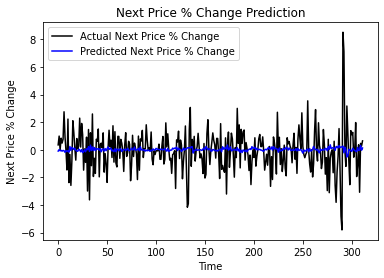

In [23]:
plt.plot(y_test, color = 'black', label = 'Actual Next Price % Change')
plt.plot(y_predict, color = 'blue', label = 'Predicted Next Price % Change')
plt.title('Next Price % Change Prediction')
plt.xlabel('Time')
plt.ylabel('Next Price % Change')
plt.legend()
plt.show()

In [22]:
mean_squared_error(y_test, y_predict)

2.327637103213301